In [2]:
import os

# Data management
import pandas as pd

# Data preprocessing and trasformation (ETL)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# Math and Stat modules
import numpy as np
from scipy.special import logit, expit
from scipy import stats

#Supervised Learning

# Unsupervised Learning

# Visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
OPCUA_dataset = pd.read_csv('OPCUA_dataset_ML.csv')

In [4]:
OPCUA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23450 entries, 0 to 23449
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23450 non-null  int64  
 1   case_id                23450 non-null  object 
 2   IPclass                23450 non-null  object 
 3   stat_flags_mean        23450 non-null  float64
 4   stat_msg_size_mean     23450 non-null  float64
 5   stat_flowDuration_tot  23450 non-null  float64
 6   trace_is_fit_TR        23450 non-null  int64  
 7   trace_fitness_TR       23450 non-null  float64
 8   missing_tokens_TR      23450 non-null  int64  
 9   consumed_tokens_TR     23450 non-null  int64  
 10  remaining_tokens_TR    23450 non-null  int64  
 11  produced_tokens_TR     23450 non-null  int64  
 12  cost_AL                23450 non-null  int64  
 13  visited_states_AL      23450 non-null  int64  
 14  queued_states_AL       23450 non-null  int64  
 15  tr

In [5]:
OPCUA_dataset['trace_fitness_TR'].value_counts().sort_index()

0.000000    23434
0.999301        1
0.999534        1
0.999535        2
1.000000       12
Name: trace_fitness_TR, dtype: int64

In [6]:
OPCUA_dataset['cost_AL'].value_counts().sort_index()

1791         2
1795         2
1799         2
3471         1
3472         1
3519         2
11078        1
21072        1
21073        2
21076        1
60003    23434
82142        1
Name: cost_AL, dtype: int64

In [7]:
OPCUA_dataset.head(5)

,Unnamed: 0,case_id,IPclass,stat_flags_mean,stat_msg_size_mean,stat_flowDuration_tot,trace_is_fit_TR,trace_fitness_TR,missing_tokens_TR,consumed_tokens_TR,remaining_tokens_TR,produced_tokens_TR,cost_AL,visited_states_AL,queued_states_AL,traversed_arcs_AL,lp_solved_AL,fitness_AL,label
0,0,192.168.1.16_40656_192.168.1.17_4840,C,1.0,226.746978,29.542159,1,1.000000,0,6947,0,6947,3472,13878,31231,34698,1,1.000000,1
1,1,192.168.1.16_44854_192.168.1.18_4840,C,1.0,226.688742,29.563349,1,1.000000,0,6945,0,6945,3471,13874,31222,34688,1,1.000000,1
2,2,192.168.1.18_45388_192.168.1.16_4840,C,1.0,226.682193,30.341139,1,1.000000,0,7041,0,7041,3519,14066,31654,35168,2,1.000000,1
3,3,192.168.1.19_50892_192.168.1.16_4840,C,1.0,226.999071,9.289258,0,0.999534,1,2147,1,2147,21072,4285,9646,10716,3829,0.998150,4
4,4,192.168.1.19_58654_192.168.1.17_4840,C,1.0,227.885223,735.826626,0,0.999301,3,4291,3,4291,82142,8566,19274,21425,8591,0.996291,4


## Check correlations
- 'missing_tokens_TR' ha correlazione 1 con 'remaining_tokens_TR' e sono generate dallo stesso algoritmo di Conformance Checking
- 'consumed_tokens_TR' ha correlazione 1 con 'produced_tokens_TR' e sono generate dallo stesso algoritmo di Conformance Checking

In [8]:
corr_matrix = OPCUA_dataset.corr(method='spearman')
corr_matrix['missing_tokens_TR'].sort_values(ascending=False)

remaining_tokens_TR      1.000000
missing_tokens_TR        1.000000
cost_AL                  0.901428
label                    0.290430
Unnamed: 0               0.034492
stat_msg_size_mean      -0.354984
lp_solved_AL            -0.501460
stat_flags_mean         -0.610014
stat_flowDuration_tot   -0.762691
consumed_tokens_TR      -0.762738
produced_tokens_TR      -0.762738
visited_states_AL       -0.762738
queued_states_AL        -0.762738
traversed_arcs_AL       -0.762738
fitness_AL              -0.762850
trace_fitness_TR        -0.762850
trace_is_fit_TR         -0.960789
Name: missing_tokens_TR, dtype: float64

In [9]:
corr_matrix['consumed_tokens_TR'].sort_values(ascending=False)

traversed_arcs_AL        1.000000
consumed_tokens_TR       1.000000
produced_tokens_TR       1.000000
visited_states_AL        1.000000
queued_states_AL         1.000000
stat_flowDuration_tot    1.000000
fitness_AL               1.000000
trace_fitness_TR         1.000000
trace_is_fit_TR          0.866050
lp_solved_AL             0.828990
stat_flags_mean          0.799846
stat_msg_size_mean       0.465566
Unnamed: 0              -0.045227
label                   -0.116399
missing_tokens_TR       -0.762738
remaining_tokens_TR     -0.762738
cost_AL                 -0.874963
Name: consumed_tokens_TR, dtype: float64

In [10]:
corr_matrix['visited_states_AL'].sort_values(ascending=False)

traversed_arcs_AL        1.000000
consumed_tokens_TR       1.000000
produced_tokens_TR       1.000000
visited_states_AL        1.000000
queued_states_AL         1.000000
stat_flowDuration_tot    1.000000
fitness_AL               1.000000
trace_fitness_TR         1.000000
trace_is_fit_TR          0.866050
lp_solved_AL             0.828990
stat_flags_mean          0.799846
stat_msg_size_mean       0.465566
Unnamed: 0              -0.045227
label                   -0.116399
missing_tokens_TR       -0.762738
remaining_tokens_TR     -0.762738
cost_AL                 -0.874963
Name: visited_states_AL, dtype: float64

## Check Scalers
- Standard
- Robust

In [13]:
std_scaler = StandardScaler()
ALcost_scaled = std_scaler.fit_transform(OPCUA_dataset['cost_AL'].values.reshape(-1,1))
TRfit_scaled = std_scaler.fit_transform(OPCUA_dataset['trace_fitness_TR'].values.reshape(-1,1))
miss_scaled = std_scaler.fit_transform(OPCUA_dataset['missing_tokens_TR'].values.reshape(-1,1))


In [14]:
print('StandardScaler Token Reply fitness')
min(TRfit_scaled),max(TRfit_scaled)

StandardScaler Token Reply fitness


(array([-0.01469734]), array([68.047741]))

In [15]:
print('StandardScaler Alignment cost')
min(ALcost_scaled),max(ALcost_scaled)

StandardScaler Alignment cost


(array([-77.29594761]), array([29.67500479]))

In [42]:
#Test robust scaler --- not applied
robust_scaler = RobustScaler()
ALcost_Rscaled = robust_scaler.fit_transform(OPCUA_dataset['cost_AL'].values.reshape(-1,1))
TRfit_Rscaled = robust_scaler.fit_transform(OPCUA_dataset['trace_fitness_TR'].values.reshape(-1,1))
min(ALcost_Rscaled),max(ALcost_Rscaled),min(TRfit_Rscaled),max(TRfit_Rscaled)

In [ ]:
OutputPMalgoCols = ['cost_AL', 'trace_fitness_TR'] # Need to be scaled
SecondaryTRalgoCols = ['missing_tokens_TR','consumed_tokens_TR'] # Other cols for TR Algo
SecondaryALalgoCols = ['queued_states_AL','lp_solved_AL'] # Other cols for AL Algo
UselessPMalgoCols = ['Unnamed: 0','remaining_tokens_TR','produced_tokens_TR'] # Can be dropped
PMalgoFeatures = OPCUA_dataset[OutputPMalgoCols]

In [ ]:
test_pipeline = ColumnTransformer([
    ('numeric', StandardScaler(), PMalgoFeatures)
])

In [68]:
OPCUA_dataset['case_id']

24389.0

# Live implementation

## Pre-processing

### Normal

In [16]:
OPCUA_dataset.head(4)

,Unnamed: 0,case_id,IPclass,trace_is_fit_TR,trace_fitness_TR,missing_tokens_TR,consumed_tokens_TR,remaining_tokens_TR,produced_tokens_TR,cost_AL,visited_states_AL,queued_states_AL,traversed_arcs_AL,lp_solved_AL,fitness_AL,label
0,0,192.168.1.16_40656_192.168.1.17_4840,C,1,1.00000,0,7125,0,7125,3561,14234,32032,35588,1,1.000000,Normal
1,1,192.168.1.16_44854_192.168.1.18_4840,C,1,1.00000,0,7123,0,7123,3560,14230,32023,35578,2,1.000000,Normal
2,2,192.168.1.18_45388_192.168.1.16_4840,C,1,1.00000,0,7219,0,7219,3608,14422,32455,36058,2,1.000000,Normal
3,3,192.168.1.19_50892_192.168.1.16_4840,C,0,0.99957,1,2325,1,2325,21161,4641,10447,11606,4233,0.998291,MITM


In [3]:
OPCUA_dataset = pd.read_csv('OPCUA_dataset_ML.csv')

# Estraggo la  colonna delle label e la rimuovo dal dataset
OPCUA_dataset_label = OPCUA_dataset['label']

OPCUA_dataset.drop(columns=['Unnamed: 0',
                            'case_id',
                            'trace_is_fit_TR',
                            'remaining_tokens_TR',
                            'produced_tokens_TR',
                            'label'],
                      inplace=True)

In [57]:
PMAlgo_outputs_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
category_pipeline = Pipeline([
    ('ordinal', OneHotEncoder())
])

In [19]:
features_standard = list(['trace_fitness_TR','missing_tokens_TR','consumed_tokens_TR','cost_AL','visited_states_AL','queued_states_AL','traversed_arcs_AL','lp_solved_AL'])
cat_features = ['IPclass']

In [5]:
data_preprocessing = ColumnTransformer([
    ('trace_fitness', PMAlgo_outputs_pipeline, ['trace_fitness_TR']),
    ('missing_tokens', PMAlgo_outputs_pipeline, ['missing_tokens_TR']),
    ('consumed_tokens', PMAlgo_outputs_pipeline, ['consumed_tokens_TR']),
    ('cost_AL', PMAlgo_outputs_pipeline, ['cost_AL']),
    ('visited_states', PMAlgo_outputs_pipeline, ['visited_states_AL']),
    ('queued_states', PMAlgo_outputs_pipeline, ['queued_states_AL']),
    ('traversed_arcs', PMAlgo_outputs_pipeline, ['traversed_arcs_AL']),
    ('lp_solved', PMAlgo_outputs_pipeline, ['lp_solved_AL']),
    ('category', category_pipeline, ['IPclass'])
],
    remainder = 'passthrough'
)

In [6]:
feature_matrix = data_preprocessing.fit_transform(OPCUA_dataset)

In [7]:
feature_matrix.shape

(74086, 12)

In [9]:
feature_matrix[0,:]

array([ 6.80477410e+01, -6.80405441e+01,  1.05825073e+02, -7.50032572e+01,
        1.05887565e+02,  1.05867427e+02,  1.05869091e+02, -8.70933841e-03,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  1.00000000e+00])

In [47]:
feature_matrix

array([[ 6.80477410e+01, -6.80405441e+01,  1.05825073e+02, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 6.80477410e+01, -6.80405441e+01,  1.05795360e+02, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 6.80477410e+01, -6.80405441e+01,  1.07221595e+02, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [-1.46973423e-02,  9.18523463e-03, -1.34484787e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.46973423e-02,  9.18523463e-03, -1.34484787e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.46973423e-02,  9.18523463e-03, -1.34484787e-02, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [10]:
from sklearn import set_config

In [12]:
set_config(display='diagram')

In [13]:
data_preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('trace_fitness',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['trace_fitness_TR']),
                                ('missing_tokens',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['missing_tokens_TR']),
                                ('consumed_tokens',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['consumed_tokens_TR']),
                                ('cost_AL',
                                 Pipeline(steps=[('scal...
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['visited_states_AL']),
                                ('queued_states',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['queued_states_AL']),
                                ('traversed_arcs',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['traversed_arcs_AL']),
                                ('lp_solved',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['lp_solved_AL']),
                                ('category',
                                 Pipeline(steps=[('ordinal', OneHotEncoder())]),
                                 ['IPclass'])])

### Split based on class

In [26]:
OPCUA_dataset = pd.read_csv('OPCUA_dataset_ML.csv')
OPCUA_dataset_label = OPCUA_dataset['label']
normal_or_DoS = (OPCUA_dataset_label == 'Normal') | (OPCUA_dataset_label == 'DoS')
X_norm_dos = OPCUA_dataset[normal_or_DoS]
y_norm_dos = OPCUA_dataset_label[normal_or_DoS]

In [27]:
y_norm_dos

0        Normal
1        Normal
2        Normal
5        Normal
9        Normal
          ...  
74081       DoS
74082       DoS
74083       DoS
74084       DoS
74085       DoS
Name: label, Length: 74031, dtype: object

In [30]:
X_norm_dos.columns

Index(['cost_AL', 'lp_solved_AL'], dtype='object')

In [29]:
X_norm_dos.drop(columns=['Unnamed: 0','IPclass', 'case_id','trace_fitness_TR','missing_tokens_TR','consumed_tokens_TR',
                            'trace_is_fit_TR','visited_states_AL','queued_states_AL','traversed_arcs_AL','fitness_AL',
                            'remaining_tokens_TR',
                            'produced_tokens_TR',
                            'label'],
                      inplace=True)

/var/folders/v6/jrh7dpmj4rn6h4bw6xqfx5n40000gn/T/ipykernel_3401/3325755143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_norm_dos.drop(columns=['Unnamed: 0','IPclass', 'case_id','trace_fitness_TR','missing_tokens_TR','consumed_tokens_TR',


# Classification

## Perceptron

In [18]:
# Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, multilabel_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# Unsupervised Learning

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [88]:
perceptron = Perceptron()
perceptron.fit(feature_matrix, OPCUA_dataset_label)

Perceptron()

In [89]:
sample_training = feature_matrix[:500,:]
sample_labels = OPCUA_dataset_label[:500]
prediction_sample = perceptron.predict(sample_training)
for i in range(len(sample_labels)):
    print(i, 'True label : {}, Predicted Label: {}'.format(sample_labels[i],prediction_sample[i]))

0 True label : Normal, Predicted Label: Normal
1 True label : Normal, Predicted Label: Normal
2 True label : Normal, Predicted Label: Normal
3 True label : MITM, Predicted Label: MITM
4 True label : MITM, Predicted Label: MITM
5 True label : Normal, Predicted Label: Normal
6 True label : MITM, Predicted Label: MITM
7 True label : MITM, Predicted Label: MITM
8 True label : MITM, Predicted Label: MITM
9 True label : Normal, Predicted Label: Normal
10 True label : Normal, Predicted Label: Normal
11 True label : Normal, Predicted Label: Normal
12 True label : Normal, Predicted Label: Normal
13 True label : Normal, Predicted Label: Normal
14 True label : Normal, Predicted Label: Normal
15 True label : MITM, Predicted Label: MITM
16 True label : Normal, Predicted Label: DoS
17 True label : Normal, Predicted Label: DoS
18 True label : Normal, Predicted Label: DoS
19 True label : Normal, Predicted Label: DoS
20 True label : Normal, Predicted Label: DoS
21 True label : Normal, Predicted Label: 

In [52]:
all_predicted = perceptron.predict(feature_matrix)

In [53]:
np.sum(all_predicted == OPCUA_dataset_label)/len(OPCUA_dataset_label)

0.9992171260427071

In [56]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, OPCUA_dataset_label, test_size = 0.3, random_state = 42)

In [57]:
X_train.shape, X_test.shape

((51860, 12), (22226, 12))

In [58]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train) # apprendo su training
predicted_test = perceptron.predict(X_test) # predico sul test
np.sum(predicted_test == y_test)/len(y_test)

0.9991901376765949

In [59]:
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(feature_matrix, OPCUA_dataset_label, test_size = 0.3)
    perceptron = Perceptron()
    perceptron.fit(X_train, y_train) # apprendo su training
    predicted_test = perceptron.predict(X_test) # predico sul test
    print(np.sum(predicted_test == y_test)/len(y_test))

0.9990551606226942
0.9986052371096914
0.9991901376765949
0.9993701070817961
0.9992351300278952
0.9989201835687933
0.9990551606226942
0.9994600917843967
0.9989201835687933
0.9992801223791955


In [60]:
perceptron = Perceptron()
perceptron_score = cross_val_score(perceptron, X_train, y_train, cv = 5)
perceptron_score

/Users/pmarincola/opt/anaconda3/envs/dse_ml_project/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


array([0.99913228, 0.99922869, 0.99922869, 0.99922869, 0.99913228])

In [61]:
rkf = RepeatedKFold(n_splits=10, n_repeats=3)
cross_val_score(perceptron, X_train, y_train, cv = rkf)

array([0.99865021, 0.99922869, 0.99884304, 0.99922869, 0.99922869,
       0.99903587, 0.99922869, 0.99961435, 0.99942152, 0.99942152,
       0.99922869, 0.99922869, 0.99884304, 0.99884304, 0.99903587,
       0.99845739, 0.99980717, 0.99980717, 0.99942152, 0.99922869,
       0.99961435, 0.99942152, 0.99884304, 0.99884304, 0.99922869,
       0.99942152, 0.99903587, 0.99942152, 0.99922869, 0.99884304])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa5b9ced460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa5b9ce88b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa5b9cedeb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa5b9ce8b80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa5d99c3f10>,
 'means': [<matplotlib.lines.Line2D at 0x7fa5b9ce8e20>,
  <matplotlib.lines.Line2D at 0x7fa5ce0b8f10>]}

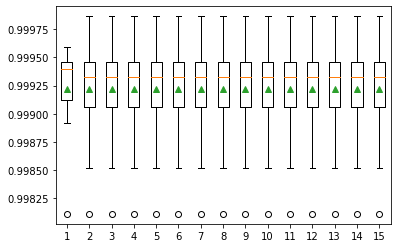

In [62]:
def valuta_modello_ripetizione(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    model = Perceptron()
    scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
    return scores

repeats = range(1,16)
results = list()
for i in repeats:
    scores = valuta_modello_ripetizione(feature_matrix, OPCUA_dataset_label, i)
    results.append(scores)
plt.boxplot(results, labels = [str(i) for i in repeats], showmeans=True)

In [64]:
kf = KFold(n_splits=10)
skf = StratifiedKFold(n_splits=10)
print('----K-fold CV----------')
for train, test in kf.split(feature_matrix, OPCUA_dataset_label):
    y_train, y_test = OPCUA_dataset_label[train], OPCUA_dataset_label[test]
    print('Train: {:.2f} vs Test: {:.2f}'.format(sum(y_train == 1)/len(y_train), sum(y_test == 1)/len(y_test)))
print('----Stratified K-fold CV-------')
for train, test in skf.split(feature_matrix, OPCUA_dataset_label):
    y_train, y_test = OPCUA_dataset_label[train], OPCUA_dataset_label[test]
    print('Train: {:.2f} vs Test: {:.2f}'.format(sum(y_train == 1)/len(y_train), sum(y_test == 1)/len(y_test)))

----K-fold CV----------
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
----Stratified K-fold CV-------
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00
Train: 0.00 vs Test: 0.00


/Users/pmarincola/opt/anaconda3/envs/dse_ml_project/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


In [90]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, OPCUA_dataset_label, test_size=0.3, random_state=45)

In [91]:
y_train_predicted = cross_val_predict(perceptron, X_train, y_train, cv = 10)

/Users/pmarincola/opt/anaconda3/envs/dse_ml_project/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [92]:
confusion_matrix(y_train, y_train_predicted,labels=['Impersonation',"Normal", "MITM", "DoS"])

array([[    0,     0,     0,    40],
       [    0,     7,     0,     5],
       [    0,     0,     4,     0],
       [    0,     0,     0, 51804]])

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[    0     0     0    40]
 [    0     7     0     5]
 [    0     0     4     0]
 [    0     0     0 51804]]


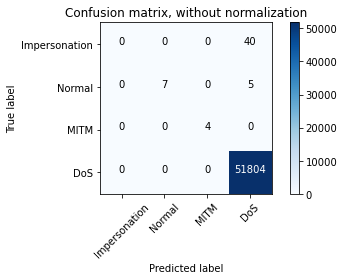

In [94]:
cnf_matrix = confusion_matrix(y_train, y_train_predicted,labels=['Impersonation',"Normal", "MITM", "DoS"])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Impersonation',"Normal", "MITM", "DoS"],
                      title='Confusion matrix, without normalization')

In [95]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train) # apprendo su training
predicted_test = perceptron.predict(X_test) # predico sul test
np.sum(predicted_test == y_test)/len(y_test)

0.9994150994330964

Confusion matrix, without normalization
[[    0     0     0     9]
 [    0     3     0     4]
 [    0     0     2     0]
 [    0     0     0 22208]]


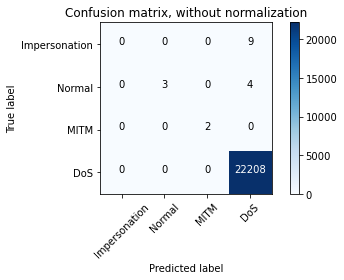

In [96]:
cnf_matrix = confusion_matrix(y_test, predicted_test,labels=['Impersonation',"Normal", "MITM", "DoS"])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Impersonation',"Normal", "MITM", "DoS"],
                      title='Confusion matrix, without normalization')

## Linear Classifier

### Verify if we can split classes with linear classification

In [94]:
OPCUA_dataset = pd.read_csv('OPCUA_dataset_ML.csv')
OPCUA_dataset_label = OPCUA_dataset['label']
normal_or_DoS = (OPCUA_dataset_label == 'Normal') | (OPCUA_dataset_label == 'DoS')
X_norm_dos = OPCUA_dataset[normal_or_DoS]
y_norm_dos = OPCUA_dataset_label[normal_or_DoS]

In [95]:
X_norm_dos.head(5)

,Unnamed: 0,case_id,IPclass,trace_is_fit_TR,trace_fitness_TR,missing_tokens_TR,consumed_tokens_TR,remaining_tokens_TR,produced_tokens_TR,cost_AL,visited_states_AL,queued_states_AL,traversed_arcs_AL,lp_solved_AL,fitness_AL,label
0,0,192.168.1.16_40656_192.168.1.17_4840,C,1,1.0,0,7125,0,7125,3561,14234,32032,35588,1,1.0,Normal
1,1,192.168.1.16_44854_192.168.1.18_4840,C,1,1.0,0,7123,0,7123,3560,14230,32023,35578,2,1.0,Normal
2,2,192.168.1.18_45388_192.168.1.16_4840,C,1,1.0,0,7219,0,7219,3608,14422,32455,36058,2,1.0,Normal
5,5,192.168.1.18_35708_192.168.1.17_4840,C,1,1.0,0,7219,0,7219,3608,14422,32455,36058,2,1.0,Normal
9,9,192.168.1.20_46374_192.168.1.21_4840,C,1,1.0,0,3675,0,3675,1836,7334,16507,18338,2,1.0,Normal


Plotting the OPCUA data Normal vs DoS
--------------------------------------------------


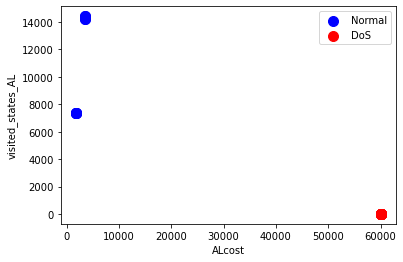

In [129]:
print(50 * '=')
print('Plotting the OPCUA data Normal vs DoS')
print(50 * '-')

# select setosa and versicolor
y = OPCUA_dataset.iloc[0:36, 15].values
y = np.where(y == 'Normal', -1, 1)

# extract sepal length and petal length
X = X_norm_dos.iloc[0:36, [9, 10]].values

# plot data
plt.scatter(X[:10, 0], X[:10, 1],
            color='blue', marker='o',s=100, label='Normal')
plt.scatter(X[18:36, 0], X[18:36, 1],
            color='red', marker='o',s=100, label='DoS')

plt.xlabel('ALcost')
plt.ylabel('visited_states_AL')
plt.legend(loc='upper right')

# plt.tight_layout()
# plt.savefig('./images/02_06.png', dpi=300)
plt.show()

In [106]:
normal_or_MITM = (OPCUA_dataset_label == 'Normal') | (OPCUA_dataset_label == 'MITM')
X_norm_MITM = OPCUA_dataset[normal_or_MITM]
y_norm_MITM = OPCUA_dataset_label[normal_or_MITM]

In [107]:
sorted_X_norm_MITM = X_norm_MITM.sort_values(by=['label','cost_AL'])

Plotting the OPCUA data - Normal vs MITM
--------------------------------------------------


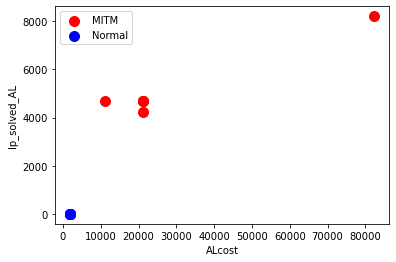

In [130]:
print(50 * '=')
print('Plotting the OPCUA data - Normal vs MITM')
print(50 * '-')

# select setosa and versicolor
y = sorted_X_norm_MITM.iloc[0:12, 15].values
y = np.where(y == 'Normal', -1, 1)

# extract sepal length and petal length
X = sorted_X_norm_MITM.iloc[0:12, [9, 13]].values

# plot data
plt.scatter(X[:6, 0], X[:6, 1],
            color='red', marker='o',s=100, label='MITM')
plt.scatter(X[6:12, 0], X[6:12, 1],
            color='blue', marker='o',s=100, label='Normal')

plt.xlabel('ALcost')
plt.ylabel('lp_solved_AL')
plt.legend(loc='upper left')

# plt.tight_layout()
# plt.savefig('./images/02_06.png', dpi=300)
plt.show()

In [112]:
normal_or_Imp = (OPCUA_dataset_label == 'Normal') | (OPCUA_dataset_label == 'Impersonation')
X_norm_Imp = OPCUA_dataset[normal_or_Imp]
y_norm_Imp = OPCUA_dataset_label[normal_or_Imp]

In [113]:
sorted_X_norm_Imp = X_norm_Imp.sort_values(by=['label','cost_AL'])

In [116]:
sorted_X_norm_Imp.head(68)

,Unnamed: 0,case_id,IPclass,trace_is_fit_TR,trace_fitness_TR,missing_tokens_TR,consumed_tokens_TR,remaining_tokens_TR,produced_tokens_TR,cost_AL,visited_states_AL,queued_states_AL,traversed_arcs_AL,lp_solved_AL,fitness_AL,label
65559,65559,192.168.1.21_4048_192.168.1.17_4840,C,0,0.0,1,1,1,1,60003,9,10,13,1,0.0,Impersonation
65560,65560,192.168.1.22_4048_192.168.1.16_4840,C,0,0.0,1,1,1,1,60003,9,10,13,1,0.0,Impersonation
65561,65561,192.168.1.20_4048_192.168.1.19_4840,C,0,0.0,1,1,1,1,60003,9,10,13,1,0.0,Impersonation
65562,65562,192.168.1.16_4048_192.168.1.22_4840,C,0,0.0,1,1,1,1,60003,9,10,13,1,0.0,Impersonation
65563,65563,192.168.1.19_4048_192.168.1.19_4840,C,0,0.0,1,1,1,1,60003,9,10,13,1,0.0,Impersonation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,20,192.168.1.21_34238_192.168.1.22_4840,C,0,0.0,1,1,1,1,60003,9,10,13,1,0.0,Normal
21,21,192.168.1.19_54874_192.168.1.21_4840,C,0,0.0,1,1,1,1,60003,9,10,13,1,0.0,Normal
22,22,192.168.1.19_60822_192.168.1.20_4840,C,0,0.0,1,1,1,1,60003,9,10,13,1,0.0,Normal
23,23,192.168.1.19_40766_192.168.1.22_4840,C,0,0.0,1,1,1,1,60003,9,10,13,1,0.0,Normal


In [119]:
sorted_X_norm_Imp.to_csv("Impersonation.csv")

Plotting the OPCUA data - Normal vs Impersonation
--------------------------------------------------


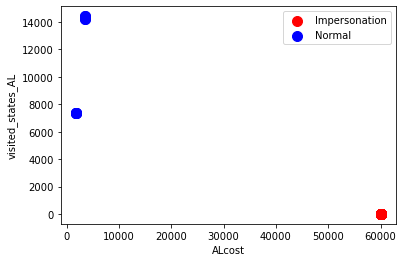

In [131]:
print(50 * '=')
print('Plotting the OPCUA data - Normal vs Impersonation')
print(50 * '-')

# select setosa and versicolor
y = sorted_X_norm_Imp.iloc[0:59, 15].values
y = np.where(y == 'Normal', -1, 1)

# extract sepal length and petal length
X = sorted_X_norm_Imp.iloc[0:59, [9, 10]].values

# plot data
plt.scatter(X[:49, 0], X[:49, 1],
            color='red', marker='o',s=100, label='Impersonation')
plt.scatter(X[49:59, 0], X[49:59, 1],
            color='blue', marker='o',s=100, label='Normal')

plt.xlabel('ALcost')
plt.ylabel('visited_states_AL')
plt.legend(loc='upper right')

# plt.tight_layout()
# plt.savefig('./images/02_06.png', dpi=300)
plt.show()

### Logistic Regression
original dataset changed with labels class as integers instead string

In [138]:
#Import dataset
OPCUA_dataset = pd.read_csv('OPCUA_dataset_ML.csv')
OPCUA_dataset_label = OPCUA_dataset['label']
print('Class labels (Legend: 1=Normal 2=Impersonation 3=DoS 4=MITM") :', np.unique(OPCUA_dataset_label))

Class labels (Legend: 1=Normal 2=Impersonation 3=DoS 4=MITM") : [1 2 3 4]


In [141]:
X = OPCUA_dataset.iloc[:,[9,13]]
y = OPCUA_dataset['label']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify=y)

In [145]:
print('Class labels y :', np.bincount(y))

Class labels y : [    0    19    49 74012     6]


In [146]:
print('Class labels y :', np.bincount(y_train))


Class labels y : [    0    14    34 51808     4]


In [147]:
print('Class labels y :', np.bincount(y_test))

Class labels y : [    0     5    15 22204     2]


In [148]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [150]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.1, random_state=1)

In [151]:
y_pred = ppn.predict(X_test_std)

In [152]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Accuracy: 0.999


In [172]:
import warnings
from matplotlib.colors import ListedColormap

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
      
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1], 
                    s=100,
                    alpha=0.9, 
                    color=cmap(idx), 
                    marker=markers[idx], 
                    label=cl)


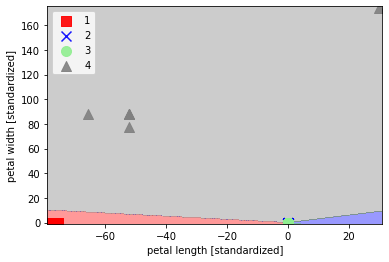

In [173]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(51860, 74086))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

# plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

In [159]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, random_state=0)

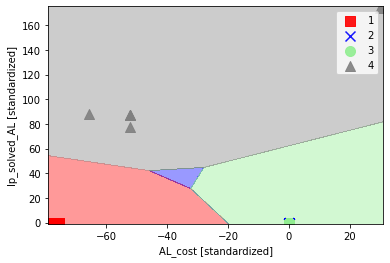

In [174]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(51860, 74086))
plt.xlabel('AL_cost [standardized]')
plt.ylabel('lp_solved_AL [standardized]')
plt.legend(loc='upper right')
# plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))


stat_msg_size_mean stat_flags_mean traversed_arcs_AL
